In [137]:
import cvxpy as cp
import numpy
import matplotlib.pyplot as plt

### Parameters

Parameters are symbolic representations of constants. The purpose of parameters is to change the value of a constant in a problem without reconstructing the entire problem.

$$
\min_x ||Ax-b||_2^2 + \gamma ||x||_1
$$

gamma_vals[0:5]: [0.0001     0.00015999 0.00025595 0.00040949 0.00065513]
gamma_vals[-5:]: [ 152641.79671752  244205.30945487  390693.99370546  625055.1925274
 1000000.        ]


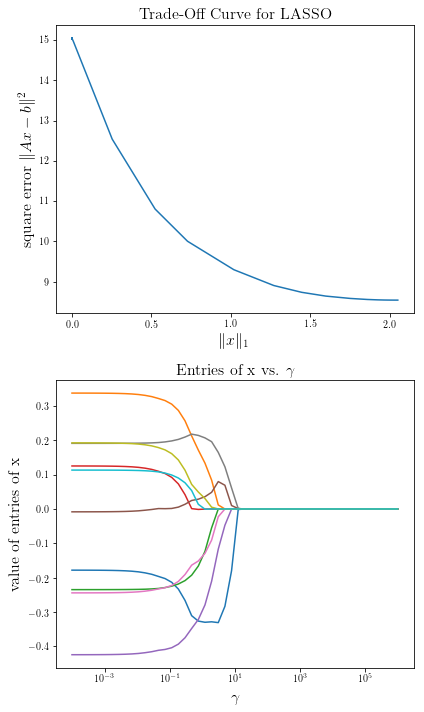

In [153]:
import cvxpy as cp
import numpy
import matplotlib.pyplot as plt

# Problem data.
n = 15
m = 10
numpy.random.seed(1)
A = numpy.random.randn(n, m)
b = numpy.random.randn(n)
# gamma must be nonnegative due to DCP rules.
gamma = cp.Parameter(nonneg=True)

# Construct the problem.
x = cp.Variable(m)
error = cp.sum_squares(A*x - b)
obj = cp.Minimize(error + gamma*cp.norm(x, 1))
prob = cp.Problem(obj)

# Construct a trade-off curve of ||Ax-b||^2 vs. ||x||_1
sq_penalty = []
l1_penalty = []
x_values = []
gamma_vals = numpy.logspace(-4, 6)
print('gamma_vals[0:5]:', gamma_vals[0:5])
print('gamma_vals[-5:]:', gamma_vals[-5:])
for val in gamma_vals:
    gamma.value = val
    prob.solve()
    # Use expr.value to get the numerical value of
    # an expression in the problem.
    sq_penalty.append(error.value)
    l1_penalty.append(cp.norm(x, 1).value)
    x_values.append(x.value)
    
plt.rc('font', family='serif')
plt.figure(figsize=(6,10))

# Plot trade-off curve.
plt.subplot(211)
plt.plot(l1_penalty, sq_penalty)
plt.xlabel(r'$\|x\|_1$', fontsize=16)
plt.ylabel(r'square error $\|Ax-b\|^2$', fontsize=16)
plt.title('Trade-Off Curve for LASSO', fontsize=16)

# Plot entries of x vs. gamma.
plt.subplot(212)
for i in range(m):
    plt.plot(gamma_vals, [xi[i] for xi in x_values])
plt.xlabel(r'$\gamma$', fontsize=16)
plt.ylabel('value of entries of x', fontsize=16)
plt.xscale('log')
plt.title(r'Entries of x vs. $\gamma$', fontsize=16)

plt.tight_layout()
plt.show()    

In [139]:
# print(x_values)
# print(sq_penalty)
print(l1_penalty)

[2.0509627682734775, 2.0508621862585987, 2.050703328162226, 2.050448702400667, 2.050040934182409, 2.049390183366158, 2.04834812085748, 2.046708672901958, 2.0440522160673873, 2.039806649225335, 2.033033724845384, 2.022193435596024, 2.006877588792783, 1.9867620083519577, 1.9627293280427456, 1.923407153362729, 1.8583620585881546, 1.75270439504176, 1.597810521290985, 1.445709917976331, 1.2703561250217947, 1.0189705658477417, 0.7273386656780123, 0.5232983552843532, 0.25317606750885047, 0.00780031637226394, 0.00029887597556857085, 1.2203697902460718e-05, 5.045866069819297e-07, 2.0945978391241455e-08, 8.706056526605673e-10, 3.620190185164535e-11, 4.715262250079037e-15, 3.767390277977661e-15, 8.715498353066683e-15, 2.3428218117013193e-14, 2.3965792741729105e-14, 2.0486373062458387e-14, 6.870728138203921e-14, 9.772419638095538e-14, 7.516163059722569e-14, 1.73853257636098e-13, 3.888908149274833e-13, 2.1326104100273438e-13, 7.74402834425076e-13, 1.4029098463019736e-12, 7.962707271119413e-13, 4.47

### Expressions

Expressions in CVXPY are formed from variables, parameters, numerical constants such as Python floats and Numpy matrices, the standard arithmetic operators +, -, *, /, and a library of functions. Here are some examples of CVXPY expressions:

$$
\max\{2.66 - \sqrt{y}, \sqrt{x+2y}\}
$$

In [140]:
# Create variables and parameters.
x, y = cp.Variable(), cp.Variable()
a, b = cp.Parameter(), cp.Parameter()

# Examples of CVXPY expressions.
3.69 + b/3
x - 4*a
cp.maximum(2.66 - cp.sqrt(y), cp.square(x + 2*y))

Expression(CONVEX, NONNEGATIVE, ())

### Dimension

The **dimensions** of an expression are stored as expr.shape. The **total number** of entries is given by expr.size, while **the number of dimensions** is given by expr.ndim.

In [141]:
import numpy

X = cp.Variable((5, 4))
A = numpy.ones((3, 5))

# Use expr.shape to get the dimensions.
print("dimensions of X:", X.shape)
print("size of X:", X.size)
print("number of dimensions:", X.ndim)
print("dimensions of sum(X):", cp.sum(X).shape)
print("dimensions of A*X:", (A*X).shape)

# ValueError raised for invalid dimensions.
try:
    A + X
except ValueError as e:
    print(e)

dimensions of X: (5, 4)
size of X: 20
number of dimensions: 2
dimensions of sum(X): ()
dimensions of A*X: (3, 4)
Cannot broadcast dimensions  (3, 5) (5, 4)


### Changing problems

#### Original problem

$$\begin{align}
\min_{x, y}\ \ & (x-y)^2\\
s.t.\ \ & x+y = 1 \\
        & x-y \ge 1
\end{align}$$

In [142]:
# Create two scalar optimization variables.
x = cp.Variable()
y = cp.Variable()

# Create two constraints.
constraints = [x + y == 1,
               x - y >= 1]

# Form objective.
obj = cp.Minimize((x - y)**2)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()  # Returns the optimal value.
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value, y.value)

status: optimal
optimal value 1.0
optimal var 1.0 1.570086213240983e-22


#### New problem

$$\begin{align}
\max_{x, y}\ \ & x+y \\
s.t.\ \ & x+y = 1\\
        & x-y \ge 1
\end{align}$$

$$\begin{align}
\max_{x,y}\ \ & x+y \\
s.t.\ \ & x+y \le 3 \\
        & x-y \ge 1
\end{align}$$

In [143]:
# Replace the objective.
prob2 = cp.Problem(cp.Maximize(x + y), prob.constraints)
print("optimal value", prob2.solve())

# Replace the constraint (x + y == 1).
constraints = [x + y <= 3] + prob2.constraints[1:]
prob3 = cp.Problem(prob2.objective, constraints)
print("optimal value", prob3.solve())

optimal value 0.9996939016105745
optimal value 3.0009677118090208


### Infeasible and unbounded problems

$$\begin{align}
\min_x\ \ & x\\
s.t.\ \ & x \ge 1\\
        & x \le 0
\end{align}$$

In [144]:
import cvxpy as cp

x = cp.Variable()

# An infeasible problem.
prob = cp.Problem(cp.Minimize(x), [x >= 1, x <= 0])
prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)

# An unbounded problem.
prob = cp.Problem(cp.Minimize(x))
prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)

status: infeasible
optimal value inf
status: unbounded
optimal value -inf


### Sign
Each (sub)expression is flagged as positive (non-negative), negative (non-positive), zero, or unknown.

In [145]:
x = cp.Variable()
a = cp.Parameter(nonpos=True)
c = numpy.array([1, -1])

print("sign of x:", x.sign)
print("sign of a:", a.sign)
print("sign of square(x):", cp.square(x).sign)
print("sign of c*a:", (c*a).sign)

sign of x: UNKNOWN
sign of a: NONPOSITIVE
sign of square(x): NONNEGATIVE
sign of c*a: UNKNOWN


### Curvature
Each (sub)expression is flagged as one of the following curvatures (with respect to its variables)

In [146]:
x = cp.Variable()
a = cp.Parameter(nonneg=True)

print("curvature of x:", x.curvature)
print("curvature of a:", a.curvature)
print("curvature of square(x):", cp.square(x).curvature)
print("curvature of sqrt(x):", cp.sqrt(x).curvature)

curvature of x: AFFINE
curvature of a: CONSTANT
curvature of square(x): CONVEX
curvature of sqrt(x): CONCAVE


### Curvature rules
DCP analysis is based on applying a general composition theorem from convex analysis to each (sub)expression.

In [147]:
print("sqrt(1 + square(x)) curvature:",
      cp.sqrt(1 + cp.square(x)).curvature)
print("norm(hstack([1, x]), 2) curvature:",
      cp.norm(cp.hstack([1, x]), 2).curvature)

sqrt(1 + square(x)) curvature: UNKNOWN
norm(hstack([1, x]), 2) curvature: CONVEX


### DCP problems
A problem is constructed from an objective and a list of constraints. If a problem follows the DCP rules, it is guaranteed to be convex and solvable by CVXPY. 

The DCP rules require that the problem objective have one of two forms:

- Minimize(convex)
- Maximize(concave)

The only valid constraints under the DCP rules are

- affine == affine
- convex <= concave
- concave >= convex


You can check that a problem, constraint, or objective satisfies the DCP rules by calling ```object.is_dcp()```. Here are some examples of DCP and non-DCP problems:

$$\begin{align}
\min_{x, y}\ \ & (x-y)^2\\
s.t.       \ \ & x + y \ge 0
\end{align}$$
<br>

$$\begin{align}
\max_{x, y}\ \ & \sqrt{x-y}\\
s.t.       \ \ & 2x - 3 = y\\
               & x^2 \le 2
\end{align}$$

In [148]:
x = cp.Variable()
y = cp.Variable()

# DCP problems.
prob1 = cp.Problem(cp.Minimize(cp.square(x - y)),
                    [x + y >= 0])
prob2 = cp.Problem(cp.Maximize(cp.sqrt(x - y)),
                [2*x - 3 == y,
                 cp.square(x) <= 2])

print("prob1 is DCP:", prob1.is_dcp())
print("prob2 is DCP:", prob2.is_dcp())

prob1 is DCP: True
prob2 is DCP: True


$$\begin{align}
\max_{x}\ \ & x^2
\end{align}$$

$$\begin{align}
\min_x\ \ & x^2\\
s.t.    \ \ & \sqrt{x}\le2
\end{align}$$

In [149]:
# Non-DCP problems.

# A non-DCP objective.
obj = cp.Maximize(cp.square(x))
prob3 = cp.Problem(obj)

print("prob3 is DCP:", prob3.is_dcp())
print("Maximize(square(x)) is DCP:", obj.is_dcp())

# A non-DCP constraint.
prob4 = cp.Problem(cp.Minimize(cp.square(x)),
                    [cp.sqrt(x) <= 2])

print ("prob4 is DCP:", prob4.is_dcp())
print ("sqrt(x) <= 2 is DCP:", (cp.sqrt(x) <= 2).is_dcp())

prob3 is DCP: False
Maximize(square(x)) is DCP: False
prob4 is DCP: False
sqrt(x) <= 2 is DCP: False


CVXPY will raise an exception if you call problem.solve() on a non-DCP problem.

In [150]:
# A non-DCP problem.
prob = cp.Problem(cp.Minimize(cp.sqrt(x)))

try:
    prob.solve()
except Exception as e:
    print(e)

Problem does not follow DCP rules.


### Dual variables

You can use CVXPY to find the optimal dual variables for a problem. When you call ```prob.solve()``` each dual variable in the solution is stored in the ```dual_value``` field of the constraint it corresponds to.

In [151]:
import cvxpy as cp

# Create two scalar optimization variables.
x = cp.Variable()
y = cp.Variable()

# Create two constraints.
constraints = [x + y == 1,
               x - y >= 1]

# Form objective.
obj = cp.Minimize((x - y)**2)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()

# The optimal dual variable (Lagrange multiplier) for
# a constraint is stored in constraint.dual_value.
print("optimal (x + y == 1) dual variable", constraints[0].dual_value)
print("optimal (x - y >= 1) dual variable", constraints[1].dual_value)
print("x - y value:", (x - y).value)

optimal (x + y == 1) dual variable 0.0
optimal (x - y >= 1) dual variable 2.0
x - y value: 1.0


#### Solve method options

In [152]:
# Solving a problem with different solvers.
x = cp.Variable(2)
obj = cp.Minimize(x[0] + cp.norm(x, 1))
constraints = [x >= 2]
prob = cp.Problem(obj, constraints)

# Solve with OSQP.
prob.solve(solver=cp.OSQP)
print("optimal value with OSQP:", prob.value)

# Solve with ECOS.
prob.solve(solver=cp.ECOS)
print("optimal value with ECOS:", prob.value)

# Solve with ECOS_BB.
prob.solve(solver=cp.ECOS_BB)
print("optimal value with ECOS_BB:", prob.value)

# # Solve with CVXOPT.
# prob.solve(solver=cp.CVXOPT)
# print("optimal value with CVXOPT:", prob.value)

# Solve with SCS.
prob.solve(solver=cp.SCS)
print("optimal value with SCS:", prob.value)

# Solve with GLPK.
# prob.solve(solver=cp.GLPK)
# print("optimal value with GLPK:", prob.value)

# Solve with GLPK_MI.
# prob.solve(solver=cp.GLPK_MI)
# print("optimal value with GLPK_MI:", prob.value)

# Solve with GUROBI.
# prob.solve(solver=cp.GUROBI)
# print("optimal value with GUROBI:", prob.value)

# Solve with MOSEK.
# prob.solve(solver=cp.MOSEK)
# print("optimal value with MOSEK:", prob.value)

# Solve with Elemental.
# prob.solve(solver=cp.ELEMENTAL)
# print("optimal value with Elemental:", prob.value)

# Solve with CBC.
# prob.solve(solver=cp.CBC)
# print("optimal value with CBC:", prob.value)

# Solve with CPLEX.
# prob.solve(solver=cp.CPLEX)
# print ("optimal value with CPLEX:", prob.value)

optimal value with OSQP: 6.0
optimal value with ECOS: 5.999999995510096
optimal value with ECOS_BB: 5.999999995510096
optimal value with SCS: 5.999999829557256
